# スペクトログラムの表示

In [1]:
#まず必要なライブラリをインストール
!pip install librosa
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.7/253.7 kB 3.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 1.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.26.0 requires blinker<2,>=1.0.0, which is not installed.
tabula-py 2.7.0 requires distro, which is not installed.

[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, r

In [5]:
import librosa
import numpy as np32
import os

DIR = os.getcwd()
filename = f"{DIR}/voice.wav" #任意のファイル名に変更してください。

#wavの読み込み
wav, sr = librosa.load(filename, sr=16000) #srはサンプリングレートなので、必要に応じて変更してください。
print("sr: ",sr)

sr:  16000


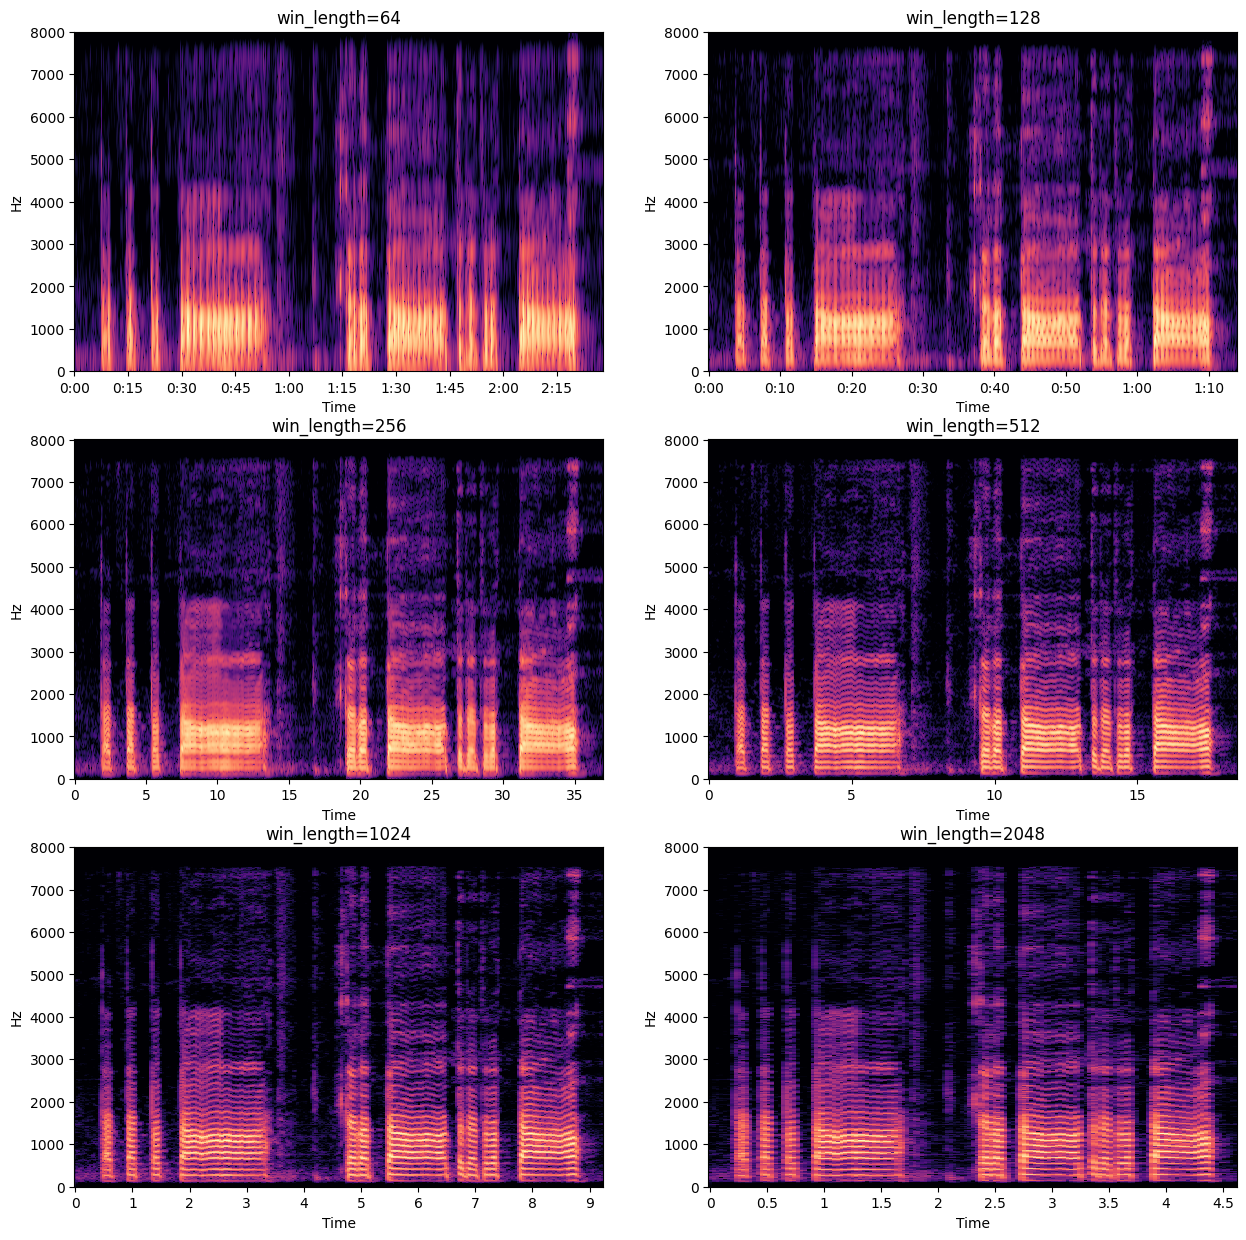

In [6]:
from matplotlib import pyplot as plt

#FFT点数
n_fft = 2048
#窓長
win_length = [64, 128, 256, 512, 1024, 2048]
#シフト量
hop_length = [wl//4 for wl in win_length]

## 比較plot用subplot
fig, ax = plt.subplots(
    figsize=(15,15),
    nrows=3,
    ncols=2,
)

for i in range(len(win_length)):
    tar_ax = ax[i//2][i%2]
    #短時間フーリエ変換
    D = librosa.stft(wav, n_fft=n_fft, win_length=win_length[i], hop_length=hop_length[i])
    #Dは複素数なので絶対値をとって振幅を得る
    S = np.abs(D)
    #デシベルに変換
    db = librosa.amplitude_to_db(S, ref=np.max)
    #スペクトログラム表示
    librosa.display.specshow(db, sr=sr, x_axis='time', y_axis='linear', ax=tar_ax)
    tar_ax.set_title(f"win_length={win_length[i]}")

